In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
updated_FRL = pd.read_excel("/share/data/school_choice/dssg/riyab_FRL_data.xlsx", None, engine='openpyxl')

In [3]:
grouped_Geoid = updated_FRL["Grouped GeoID External"]
grouped_Geoid.tail(10)

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
4584,60750264011010,60750264011010,137.25,100.50,72.50,52.75
4585,60750614001000,60750614001000,141.75,118.50,110.75,95.00
4586,60750231031006,60750231031006,154.50,120.25,109.50,85.25
4587,60750231021014,60750231021014,157.25,109.25,119.50,81.75
4588,60750231022004,60750231022004,166.25,126.00,140.50,107.00
4589,60750610001004,60750610001004,168.75,91.75,75.25,48.00
4590,60750234002014,60750234002014,176.75,153.25,147.00,127.75
4591,60750231032017,60750231032017,187.25,136.25,149.00,107.00
4592,60750605022000,60750605022000,197.00,174.50,140.50,121.25
4593,60750125011002,60750125011002,200.75,153.00,90.00,68.00


In [4]:
#filtering out blocks with less than 5 students for now (GEOID group is not the GEOID)
grouped_Geoid_filtered = grouped_Geoid[grouped_Geoid["Geoid Group"].astype('str').str.len() > 3]
grouped_Geoid_filtered

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
1636,60750161002003,60750161002003,5.00,5.00,1.00,1.00
1637,60750209004007,60750209004007,5.00,4.50,4.75,4.25
1638,60750177002016,60750177002016,5.00,4.50,2.25,2.25
1639,60750104001004,60750104001004,5.00,3.75,0.25,0.00
1640,60750228011002,60750228011002,5.00,3.50,2.00,1.00
...,...,...,...,...,...,...
4589,60750610001004,60750610001004,168.75,91.75,75.25,48.00
4590,60750234002014,60750234002014,176.75,153.25,147.00,127.75
4591,60750231032017,60750231032017,187.25,136.25,149.00,107.00
4592,60750605022000,60750605022000,197.00,174.50,140.50,121.25


In [5]:
df = pd.read_csv("~/displacement-typologies/data/outputs/typologies/SanFrancisco_typology_output.csv", sep=",")
df["GEOID"]

0       6055200202
1       6055200400
2       6055200900
3       6067006101
4       6067006102
           ...    
2104    6055201401
2105    6055201402
2106    6055201403
2107    6055201601
2108    6055201602
Name: GEOID, Length: 2109, dtype: int64

In [6]:
grouped_Geoid_filtered["Geoid Group"]

1636    60750161002003
1637    60750209004007
1638    60750177002016
1639    60750104001004
1640    60750228011002
             ...      
4589    60750610001004
4590    60750234002014
4591    60750231032017
4592    60750605022000
4593    60750125011002
Name: Geoid Group, Length: 2958, dtype: int64

Getting the first 10 digits of the GEOID group to access the [Census Tract id](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html). This allows us to merge the FRL data Henry shared with us with the block database. 

In [7]:
grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)

<ipython-input-7-327fa331601b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


In [8]:
grouped_Geoid_filtered

,Geoid10,Geoid Group,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,New Geoid
1636,60750161002003,60750161002003,5.00,5.00,1.00,1.00,6075016100
1637,60750209004007,60750209004007,5.00,4.50,4.75,4.25,6075020900
1638,60750177002016,60750177002016,5.00,4.50,2.25,2.25,6075017700
1639,60750104001004,60750104001004,5.00,3.75,0.25,0.00,6075010400
1640,60750228011002,60750228011002,5.00,3.50,2.00,1.00,6075022801
...,...,...,...,...,...,...,...
4589,60750610001004,60750610001004,168.75,91.75,75.25,48.00,6075061000
4590,60750234002014,60750234002014,176.75,153.25,147.00,127.75,6075023400
4591,60750231032017,60750231032017,187.25,136.25,149.00,107.00,6075023103
4592,60750605022000,60750605022000,197.00,174.50,140.50,121.25,6075060502


In [9]:
grouped_Geoid_filtered.dtypes

Geoid10                       int64
Geoid Group                   int64
4YR AVG Student Count       float64
4YR AVG FRL Count           float64
4YR AVG Eth Flag Count      float64
4YR AVG Combo Flag Count    float64
New Geoid                     int64
dtype: object

In [10]:
grouped_Geoid_filtered = grouped_Geoid_filtered.merge(df, left_on = "New Geoid", right_on = "GEOID")

In [11]:
grouped_Geoid_new = grouped_Geoid_filtered[["GEOID", "4YR AVG Student Count", "4YR AVG FRL Count", "4YR AVG Eth Flag Count", "4YR AVG Combo Flag Count",
                                            "OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]]
grouped_Geoid_new

,GEOID,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075016100,5.00,5.00,1.00,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6075016100,5.25,4.25,4.50,3.75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075016100,7.75,6.25,4.50,3.50,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6075016100,8.25,7.50,6.75,6.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6075016100,9.75,2.25,2.00,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,6075012401,66.50,54.25,22.50,18.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,6075012401,68.50,58.25,37.75,32.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,6075012401,76.75,62.75,32.50,27.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,6075012401,98.75,83.25,68.50,57.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
grouped_Geoid_new = grouped_Geoid_new.drop_duplicates()

In [13]:
grouped_Geoid_new.head(20)

,GEOID,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075016100,5.00,5.00,1.00,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6075016100,5.25,4.25,4.50,3.75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075016100,7.75,6.25,4.50,3.50,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6075016100,8.25,7.50,6.75,6.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6075016100,9.75,2.25,2.00,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6075016100,11.75,5.50,5.75,3.25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6075016100,15.75,10.25,11.00,8.25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6075016100,18.75,9.75,6.25,5.25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6075016100,19.50,14.75,9.00,7.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6075016100,22.00,13.75,14.25,7.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
grouped_Geoid_new = grouped_Geoid_new.dropna(axis=0, how='all')
grouped_Geoid_new = grouped_Geoid_new.dropna(axis=1, how='all')

In [15]:
grouped_Geoid_new = grouped_Geoid_new.groupby("GEOID").sum()
grouped_Geoid_new

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
GEOID,,,,,,,,,,,,
6075010100,177.250000,144.500000,66.250000,54.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6075010300,93.500000,30.500000,6.500000,3.00,0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
6075010400,122.750000,50.750000,13.750000,2.25,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
6075010500,89.000000,63.750000,8.250000,7.00,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
6075010600,176.250000,126.500000,21.500000,15.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6075061500,164.250000,89.500000,42.000000,30.50,0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
6075980200,6.500000,0.000000,1.500000,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6075980501,58.000000,39.500000,33.500000,26.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
grouped_Geoid_new
#write a script to create a new "gentrification column"

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
GEOID,,,,,,,,,,,,
6075010100,177.250000,144.500000,66.250000,54.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6075010300,93.500000,30.500000,6.500000,3.00,0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
6075010400,122.750000,50.750000,13.750000,2.25,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
6075010500,89.000000,63.750000,8.250000,7.00,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
6075010600,176.250000,126.500000,21.500000,15.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6075061500,164.250000,89.500000,42.000000,30.50,0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
6075980200,6.500000,0.000000,1.500000,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6075980501,58.000000,39.500000,33.500000,26.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wrote a script through run through each of the gentrification columns, and find the categorical value for each row - which will then be added to the `gentrification_values` list

In [17]:
gentrification_cols = ["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]
gentrification_values = []

for i in grouped_Geoid_new.index: 
    new_value = None
    for col in gentrification_cols: 
        if grouped_Geoid_new.loc[i, col] != 0.0: 
            new_value = col
    gentrification_values.append(new_value)
len(grouped_Geoid_new)

186

In [18]:
len(gentrification_values)

186

Filter out rows that have "None" in their gentrification column

In [19]:
grouped_Geoid_new["Gentrification"] = gentrification_values
grouped_Geoid_new.head(30)
grouped_Geoid_gent = grouped_Geoid_new[grouped_Geoid_new["Gentrification"].notnull()]
grouped_Geoid_gent.head(10)

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE,Gentrification
GEOID,,,,,,,,,,,,,
6075010300,93.50,30.50,6.50,3.00,0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,ARE
6075010400,122.75,50.75,13.75,2.25,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,ARE
6075010500,89.00,63.75,8.25,7.00,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,ARE
6075010700,422.25,344.50,25.75,21.00,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OD
6075010800,154.25,105.25,6.75,3.75,0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,BE
6075010900,43.75,11.50,4.00,0.75,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,SMMI
6075011000,146.00,93.75,6.75,3.75,0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,BE
6075011100,118.75,83.25,23.75,16.00,0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,ARE
6075011200,65.25,42.00,2.75,2.75,0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,BE


<AxesSubplot:xlabel='GEOID'>

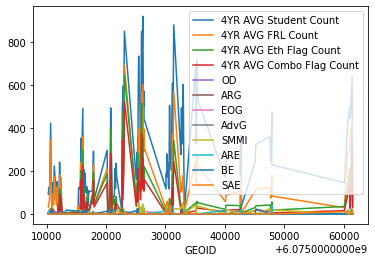

In [22]:
grouped_Geoid_gent.plot()

In [146]:
grouped_Geoid_gent = grouped_Geoid_gent[["4YR AVG Student Count", "4YR AVG FRL Count", "4YR AVG Eth Flag Count", "4YR AVG Combo Flag Count", "Gentrification"]]
grouped_Geoid_gent.head(10)

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification
GEOID,,,,,
6075010300,93.50,30.50,6.50,3.00,ARE
6075010400,122.75,50.75,13.75,2.25,ARE
6075010500,89.00,63.75,8.25,7.00,ARE
6075010700,422.25,344.50,25.75,21.00,OD
6075010800,154.25,105.25,6.75,3.75,BE
6075010900,43.75,11.50,4.00,0.75,SMMI
6075011000,146.00,93.75,6.75,3.75,BE
6075011100,118.75,83.25,23.75,16.00,ARE
6075011200,65.25,42.00,2.75,2.75,BE


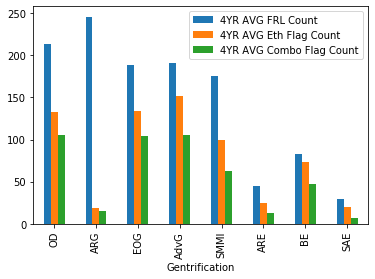

In [147]:
gentrification_agg = grouped_Geoid_gent.groupby("Gentrification").mean()
gentrification_agg_new = gentrification_agg.drop("4YR AVG Student Count", axis = 1)
gentrification_agg_new.loc[gentrification_cols].plot.bar()

This grouped bar chart illustrates the distribution of various 4YR demographic counts in terms of gentrification typology. 

In [149]:
gentrification_agg

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
Gentrification,,,,
ARE,123.250000,44.571429,24.702381,12.976190
ARG,298.250000,245.375000,19.375000,15.500000
AdvG,333.610000,190.796667,151.036667,105.880000
BE,179.589286,83.223214,73.482143,46.830357
EOG,254.937500,188.625000,134.000000,103.875000
OD,274.527778,213.222222,133.055556,105.472222
SAE,137.982143,29.267857,20.160714,7.589286
SMMI,359.343750,174.875000,99.151786,62.808036


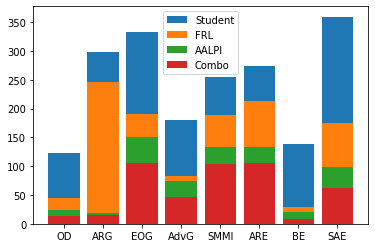

In [154]:
labels = ["Student", "FRL", "AALPI", "Combo"]
plt.bar(gentrification_cols, gentrification_agg["4YR AVG Student Count"])
plt.bar(gentrification_cols, gentrification_agg["4YR AVG FRL Count"])
plt.bar(gentrification_cols, gentrification_agg["4YR AVG Eth Flag Count"])
plt.bar(gentrification_cols, gentrification_agg["4YR AVG Combo Flag Count"])
plt.legend(labels)

This is a stacked barchart illustrating the counts of each demographic group in blocks compared to the block's gentrification status. We can see the breakdown of demographic factors within each gentrification status. 

In [145]:
gentrification_agg_new = gentrification_agg_new.reindex(gentrification_cols)
gentrification_agg_new

,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count
Gentrification,,,
OD,213.222222,133.055556,105.472222
ARG,245.375000,19.375000,15.500000
EOG,188.625000,134.000000,103.875000
AdvG,190.796667,151.036667,105.880000
SMMI,174.875000,99.151786,62.808036
ARE,44.571429,24.702381,12.976190
BE,83.223214,73.482143,46.830357
SAE,29.267857,20.160714,7.589286


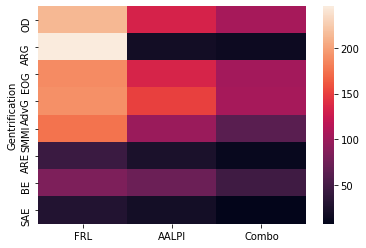

In [123]:
x_axis_labels = ["FRL", "AALPI", "Combo"]
sns.heatmap(gentrification_agg_new, xticklabels = x_axis_labels)

This chart shows us that OD, EOG, and AdvG hold the highest proportion of focal students (want to target those communities). We can see also that on the lower end of the y_axis, or higher on the gentrification spectrum, there are less focal students.

In [44]:
grouped_Geoid_new.loc[1, "ARE"]

KeyError: 1

In [18]:
#heatmap of FRL/AALPI vs CTIP assignments would also be interesting 
block_df_dict = pd.read_excel("/share/data/school_choice/Data/SF 2010 blks 022119 with field descriptions (1).xlsx", None, engine='openpyxl')

In [19]:
block_database = block_df_dict["block database"]
block_database = block_database.dropna(axis=0, how='all')
block_database = block_database.dropna(axis=1, how='all')
block_database["CTIP_2013 assignment"]

0       CTIP4
1       CTIP4
2       CTIP1
3       CTIP1
4       CTIP1
        ...  
7318    CTIP4
7319    CTIP4
7320    CTIP4
7321    CTIP4
7322    CTIP4
Name: CTIP_2013 assignment, Length: 7323, dtype: object

In [20]:
ctip_vs_demo = block_database.merge(grouped_Geoid_filtered, left_on = "Tract", right_on = "GEOID")
ctip_vs_demo

,ID,AREA,DATA,Block,Block Type,BlockGroup,Tract,County,Place,UnifSchool,...,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,,0.009403,17481,60750604001012,land - zero population,60750604001,6075060400,6075,667000,634410,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,,0.009403,17481,60750604001012,land - zero population,60750604001,6075060400,6075,667000,634410,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
2,,0.109778,17501,60750604001011,land - populated,60750604001,6075060400,6075,667000,634410,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
3,,0.109778,17501,60750604001011,land - populated,60750604001,6075060400,6075,667000,634410,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
4,39229,0.001604,41877,60750604001035,land - zero population,60750604001,6075060400,6075,667000,634410,...,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133292,16034,0.000922,17629,60750354005011,land - zero population,60750354005,6075035400,6075,667000,634410,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
133293,16034,0.000922,17629,60750354005011,land - zero population,60750354005,6075035400,6075,667000,634410,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
133294,16034,0.000922,17629,60750354005011,land - zero population,60750354005,6075035400,6075,667000,634410,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
133295,16034,0.000922,17629,60750354005011,land - zero population,60750354005,6075035400,6075,667000,634410,...,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']


In [21]:
ctip_vs_demo = ctip_vs_demo[["GEOID", "CTIP_2013 assignment", "OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]]
ctip_vs_demo

,GEOID,CTIP_2013 assignment,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
133292,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133293,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133294,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133295,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
ctip_vs_demo

,GEOID,CTIP_2013 assignment,OD,ARG,EOG,AdvG,SMMI,ARE,BE,SAE
0,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6075060400,CTIP4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
133292,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133293,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133294,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133295,6075035400,CTIP4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


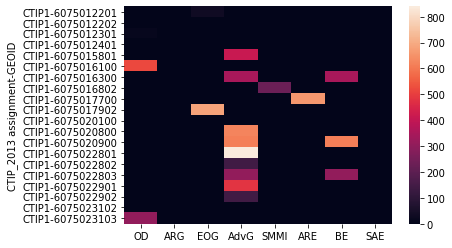